# **House Price Prediction Project**

Problem Statement:


Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?

Business Goal:


You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [29]:
df=pd.read_csv('/content/train.csv')
dft=pd.read_csv('/content/test.csv')

In [17]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,...,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,...,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,...,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,...,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,...,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [4]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

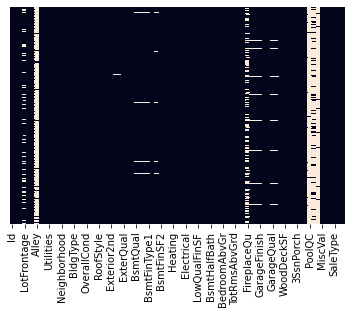

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [6]:
df.shape

(1168, 81)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [19]:
df.isnull().sum().sort_values(ascending=False).head(20)

LotFrontage     214
GarageYrBlt      64
MasVnrType        7
MasVnrArea        7
SalePrice         0
ExterCond         0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
ExterQual         0
BsmtQual          0
Foundation        0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
dtype: int64

In [30]:
#PopolQC NA stands for No Pool
df['PoolQC'].fillna('No_Pool',inplace=True)

#Miscfeature NA stands for none
df['MiscFeature'].fillna('None',inplace=True)

#Alley NA stands for No alley access, we will fill it with no alley
df['Alley'].fillna('No_Alley',inplace=True)

#Fence NA stands for No fence
df['Fence'].fillna('No_Fence',inplace=True)

#FireplaceQu NA stands for No fireplace
df['FireplaceQu'].fillna('No_Fireplace',inplace=True)

#GarageFinish, GarageType, GarageQual and GarageCond all 4 feature has NA as No garage
columns=['GarageFinish','GarageType','GarageQual','GarageCond']
for i in columns:
    df[i].fillna('No_Garage',inplace=True)
    
#BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2, NA stands for No_basement
columns2=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
for j in columns2:
    df[j].fillna('No_Basement',inplace=True)

In [31]:
df.isnull().sum().sort_values(ascending=False).head(20)

LotFrontage     214
GarageYrBlt      64
MasVnrType        7
MasVnrArea        7
SalePrice         0
ExterCond         0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
ExterQual         0
BsmtQual          0
Foundation        0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
dtype: int64

In [32]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')

In [33]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna('0')

In [34]:
df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].median(),inplace=True)

In [35]:
df.isnull().sum().sort_values(ascending=False).head(20)

SalePrice       0
Heating         0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
YearRemodAdd    0
dtype: int64

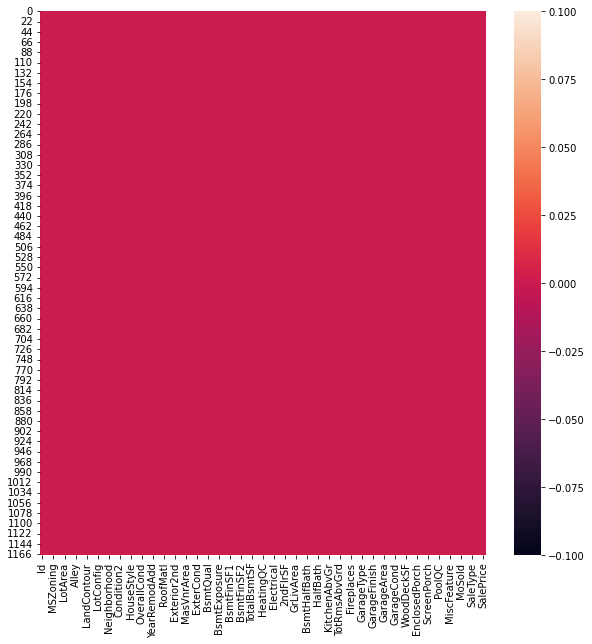

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull());

In [36]:
dft.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [37]:
dft.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          292
MiscFeature     282
Alley           278
Fence           248
FireplaceQu     139
LotFrontage      45
GarageCond       17
GarageType       17
GarageYrBlt      17
GarageFinish     17
GarageQual       17
BsmtExposure      7
BsmtCond          7
BsmtQual          7
BsmtFinType1      7
BsmtFinType2      7
Electrical        1
MasVnrArea        1
MasVnrType        1
LotConfig         0
dtype: int64

In [41]:
#PopolQC NA stands for No Pool
dft['PoolQC'].fillna('No_Pool',inplace=True)

#Miscfeature NA stands for none
dft['MiscFeature'].fillna('None',inplace=True)

#Alley NA stands for No alley access, we will fill it with no alley
dft['Alley'].fillna('No_Alley',inplace=True)

#Fence NA stands for No fence
dft['Fence'].fillna('No_Fence',inplace=True)

#FireplaceQu NA stands for No fireplace
dft['FireplaceQu'].fillna('No_Fireplace',inplace=True)

#GarageFinish, GarageType, GarageQual and GarageCond all 4 feature has NA as No garage
columns=['GarageFinish','GarageType','GarageQual','GarageCond']
for i in columns:
    dft[i].fillna('No_Garage',inplace=True)
    
#BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2, NA stands for No_basement
columns2=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
for j in columns2:
    dft[j].fillna('No_Basement',inplace=True)

In [42]:
dft['LotFrontage'].fillna(dft['LotFrontage'].median(),inplace=True)
dft['MasVnrArea'].fillna(dft['MasVnrArea'].median(),inplace=True)

In [43]:
dft['GarageYrBlt'] = dft['GarageYrBlt'].fillna('0')
dft['MasVnrType'] = dft['MasVnrType'].fillna('None')
dft['Electrical'] = dft['Electrical'].fillna('mode')

In [44]:
dft.isnull().sum().sort_values(ascending=False).head(20)

SaleCondition    0
SaleType         0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
YearRemodAdd     0
dtype: int64

In [46]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.807363,10484.749144,6.104452,5.595890,1970.930651,1984.758562,101.696918,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,22.440317,8957.442311,1.390153,1.124343,30.145255,20.785185,182.218483,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.000000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.000000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,79.250000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


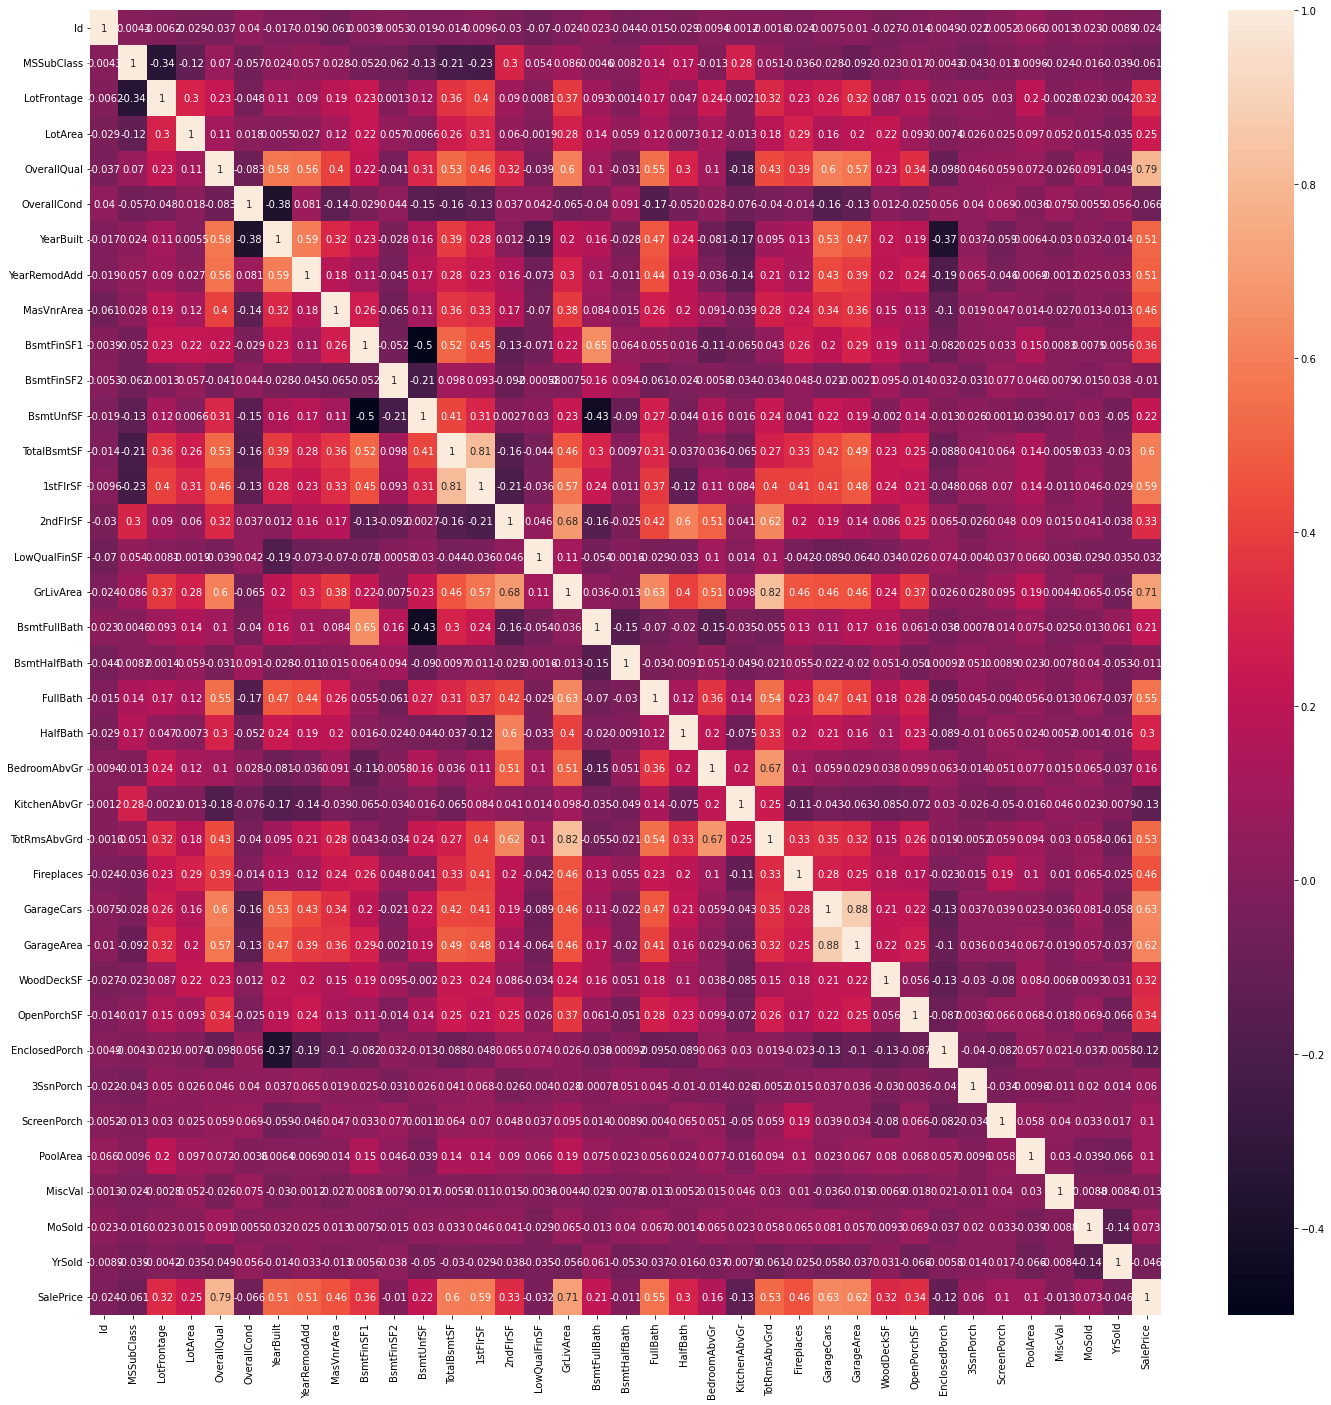

In [50]:
cor=df.corr()

plt.figure(figsize=(24,24))
sns.heatmap(cor,annot=True)
plt.show()

Text(0.5, 1.0, 'Mean House Price vs YearSold')

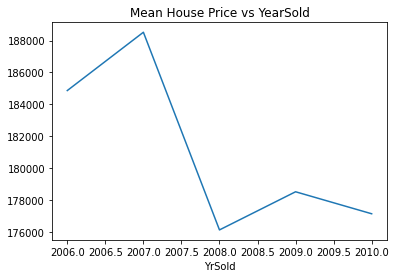

In [51]:
df.groupby('YrSold')['SalePrice'].mean().plot()
plt.title("Mean House Price vs YearSold")

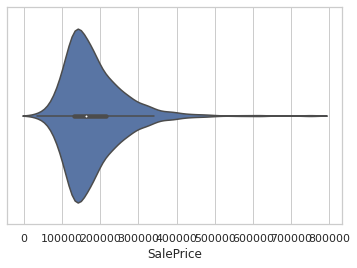

In [53]:
sns.set(style='whitegrid')
sns.violinplot(df['SalePrice'])
plt.show()

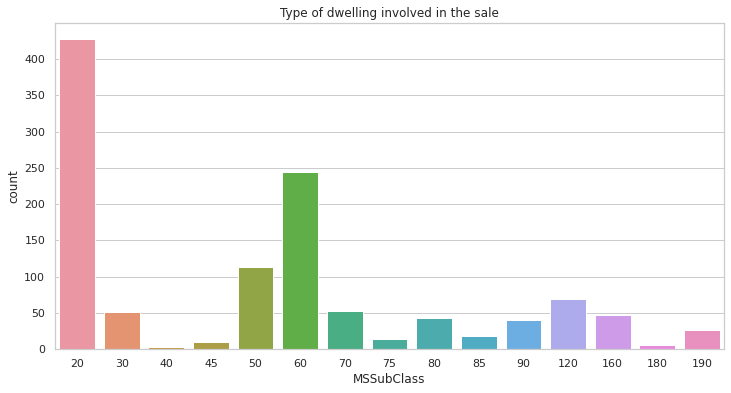

In [54]:
plt.figure(figsize=[12,6])
sns.countplot(df.MSSubClass)
plt.title('Type of dwelling involved in the sale')
plt.show()

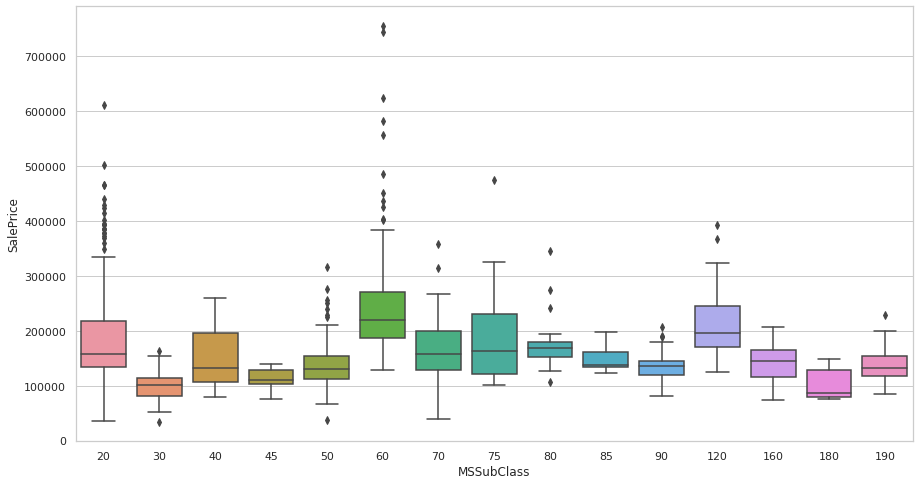

In [55]:
plt.figure(figsize=(15,8))
sns.boxplot(x='MSSubClass',y='SalePrice',data=df.sort_values('SalePrice',ascending=False))
plt.show()

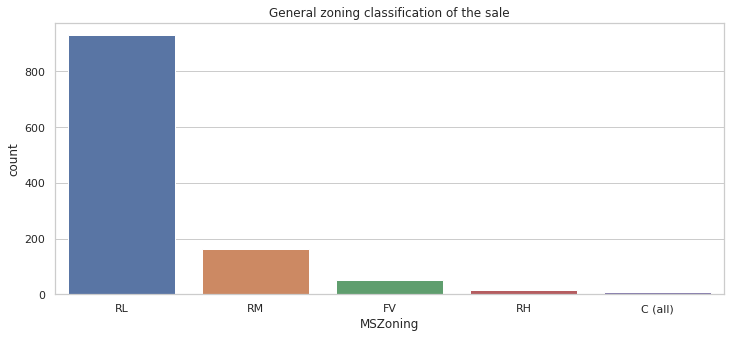

In [56]:
plt.figure(figsize=[12,5])
sns.countplot(df.MSZoning)
plt.title('General zoning classification of the sale')
plt.show()

<Figure size 864x576 with 0 Axes>

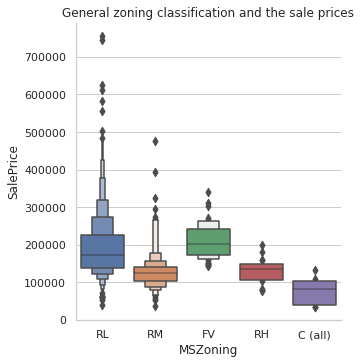

In [57]:
plt.figure(figsize=[12,8])
sns.catplot(x='MSZoning', y='SalePrice',data=df.sort_values('SalePrice',ascending=False), kind='boxen')
plt.title('General zoning classification and the sale prices')
plt.show()

Observations:

For Residential Low Density (RL), the maximum prices are ranging between 50,000 to 4,00,000.

For Floating Village Residential (FV), the maximum prices are ranging between 150000 to 250000.

In [58]:
df['Street'].value_counts()

Pave    1164
Grvl       4
Name: Street, dtype: int64

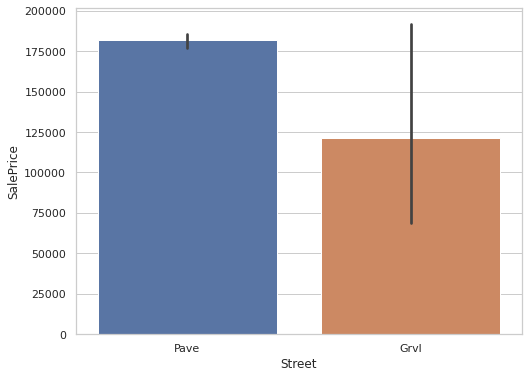

In [59]:
plt.figure(figsize=[8,6])
sns.barplot(x='Street', y='SalePrice', data = df.sort_values('SalePrice', ascending=False))

plt.show()


we can observe that the property with the road access of Pave is in more demand and so its price is also high.

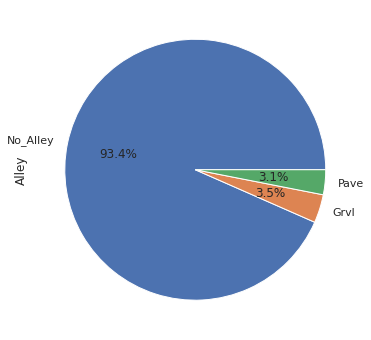

In [61]:
plt.figure(figsize=[6,6])
df['Alley'].value_counts().plot.pie(autopct='%0.1f%%')

We can see that approx 94% property have no alley access.

<Figure size 576x432 with 0 Axes>

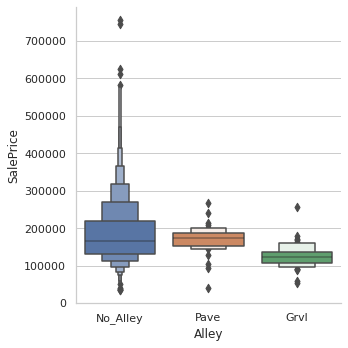

In [62]:
plt.figure(figsize=[8,6])
sns.catplot(x='Alley', y='SalePrice', data=df.sort_values('SalePrice', ascending=False), kind = 'boxen')
plt.show()

We can observe that the effect of alley access to the properties is very less. So, it is better to remove this column as approx 94% of properties has no alley access.

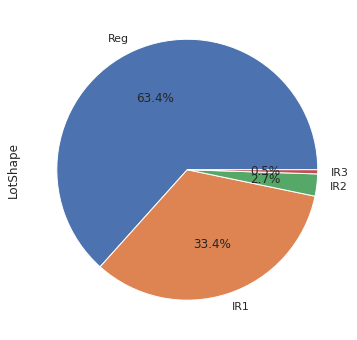

In [63]:
plt.figure(figsize=[6,6])
df['LotShape'].value_counts().plot.pie(autopct='%0.1f%%')

Observations:

We can see that most of the properties are of regular shape (approx 63%).
Approx 33% properties are of slightly irregular shape.

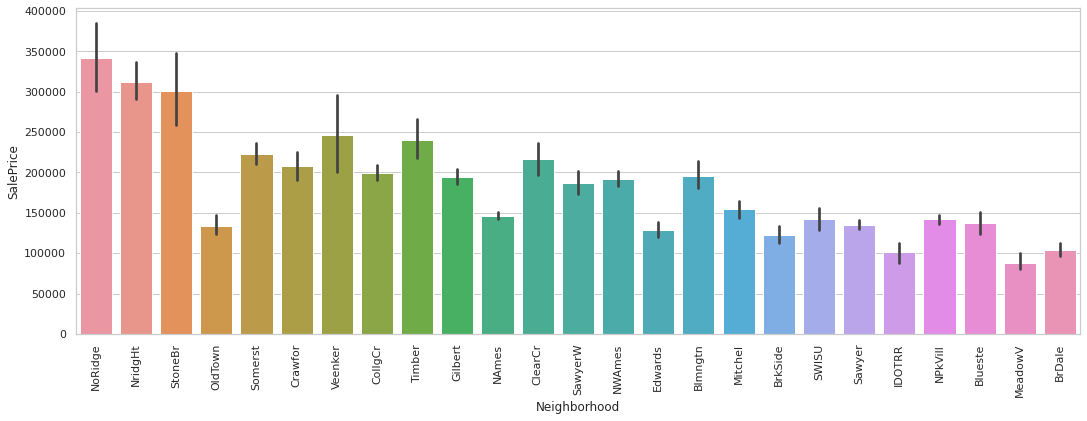

In [64]:
plt.figure(figsize=[18,6])
sns.barplot(x='Neighborhood', y='SalePrice', data= df.sort_values('SalePrice', ascending=False))
plt.xticks(rotation=90)
plt.show()

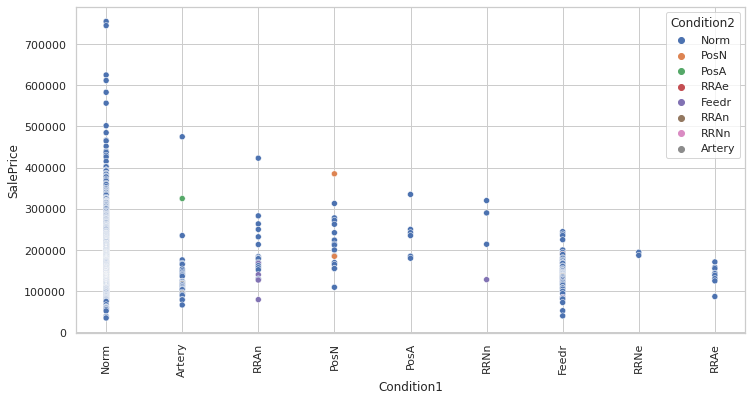

In [65]:
plt.figure(figsize=[12,6])
sns.scatterplot(x='Condition1', y='SalePrice', hue='Condition2', data=df.sort_values('SalePrice', ascending=False))
plt.xticks(rotation=90)
plt.show()

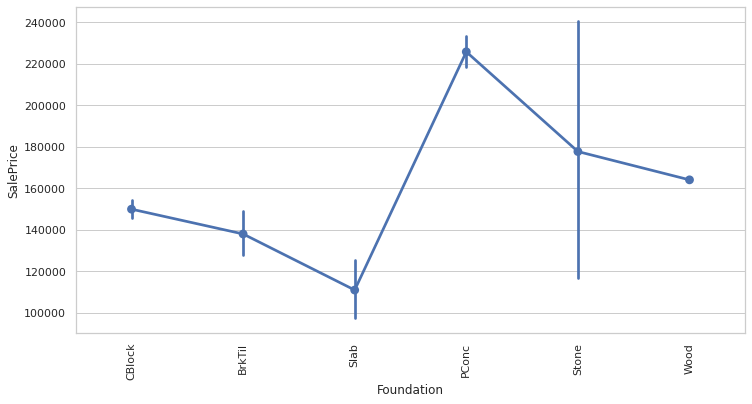

In [66]:
plt.figure(figsize=[12,6])
sns.pointplot(x='Foundation', y = 'SalePrice', data=df.sort_values('SalePrice'))
plt.xticks(rotation=90)
plt.show()

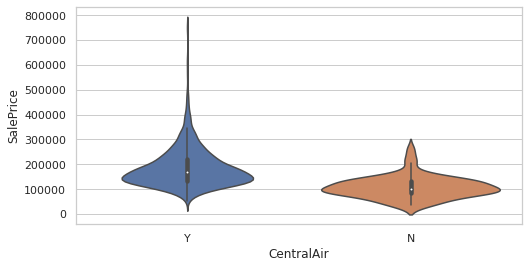

In [67]:
plt.figure(figsize=[8,4])
sns.violinplot(x='CentralAir', y='SalePrice', data=df.sort_values('SalePrice', ascending=False))

plt.show()

- Houses having the option of central air conditioning have more price.

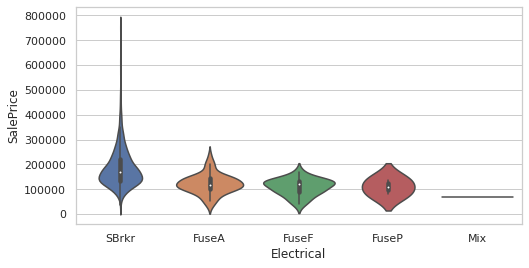

In [68]:
plt.figure(figsize=[8,4])
sns.violinplot(x='Electrical', y='SalePrice', data=df.sort_values('SalePrice', ascending=False))

plt.show()


SBrkr Standard Circuit Breakers & Romex

FuseA Fuse Box over 60 AMP and all Romex wiring (Average)

FuseF 60 AMP Fuse Box and mostly Romex wiring (Fair)

FuseP 60 AMP Fuse Box and mostly knob & tube wiring (poor)

Mix Mixed

Most of the houses are having the electrical system of standard circuit breakers and romex.

In [70]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
df[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,Gd,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,TA,Attchd,1977,RFn,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
1,RL,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,Gd,Gd,PConc,TA,Gd,Gd,ALQ,Rec,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,1970,Unf,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
2,RL,Pave,No_Alley,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,None,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1997,Unf,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
3,RL,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Plywood,Plywood,BrkFace,TA,TA,CBlock,Gd,TA,No,BLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1977,RFn,TA,TA,Y,No_Pool,MnPrv,None,COD,Normal
4,RL,Pave,No_Alley,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,CemntBd,CmentBd,Stone,Gd,TA,CBlock,Gd,TA,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,TA,Attchd,1977,Fin,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal


LinAlgError: ignored

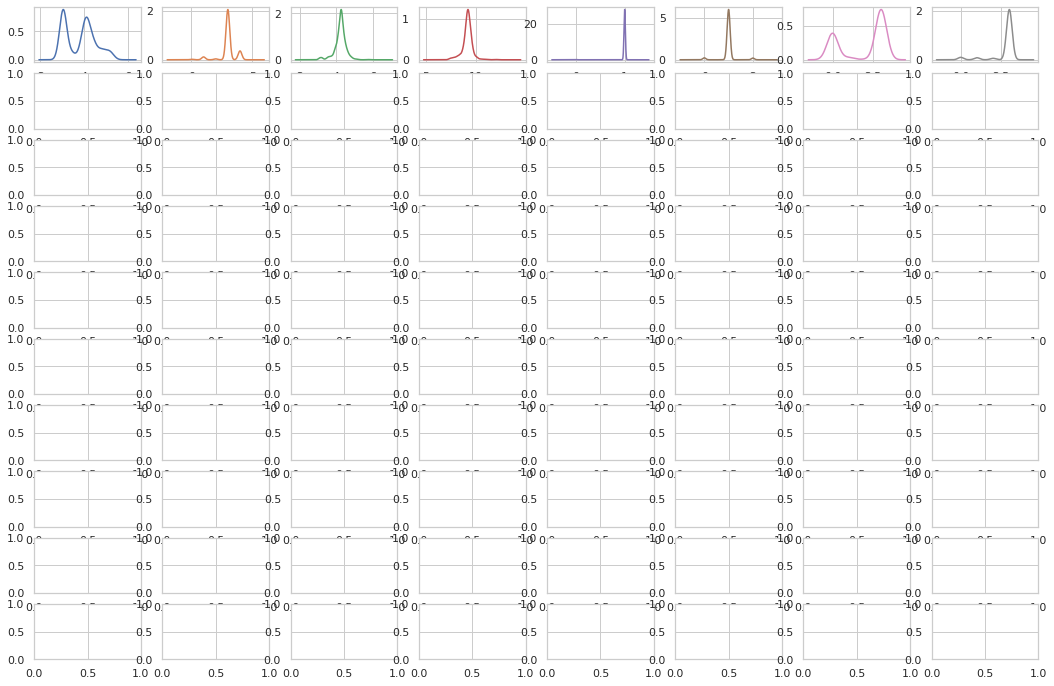

In [100]:
df.plot(kind='density', subplots=True, layout=(10,8), sharex=False, legend=False, fontsize=1, figsize=[18,12])
plt.show()

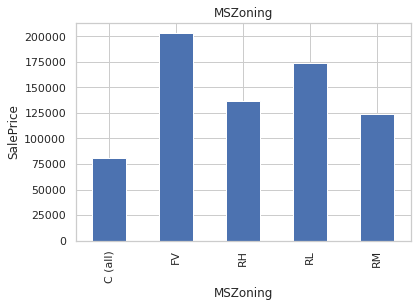

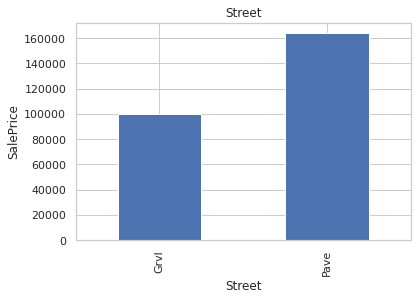

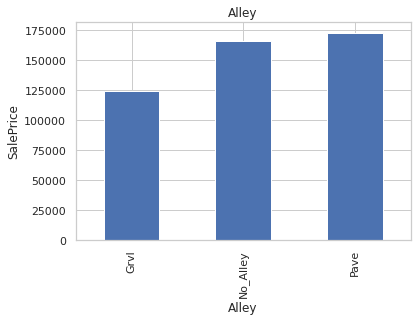

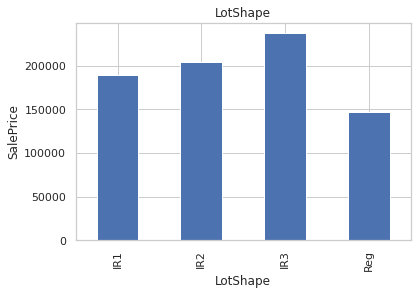

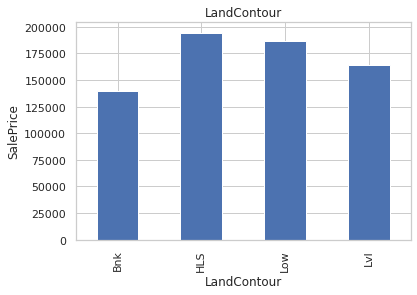

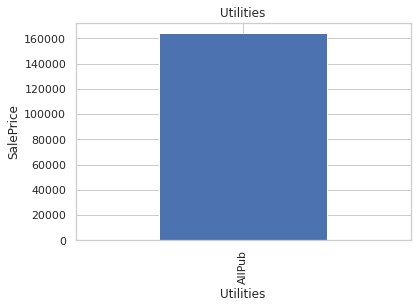

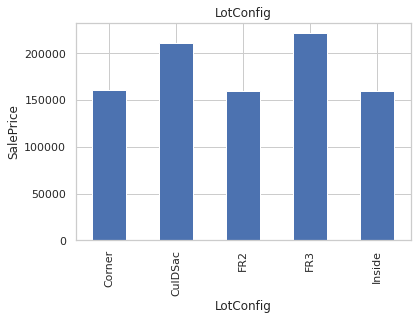

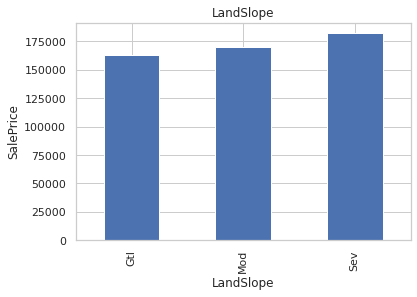

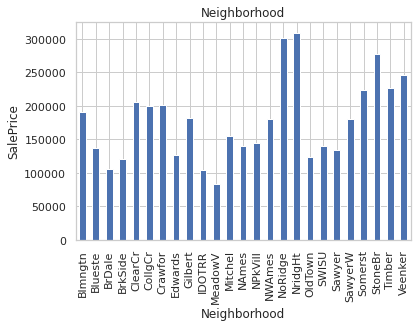

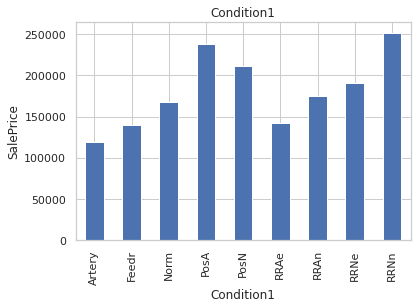

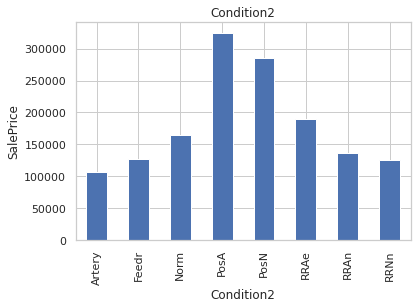

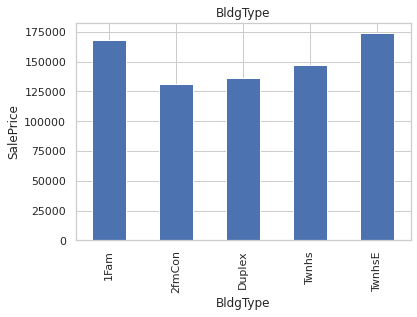

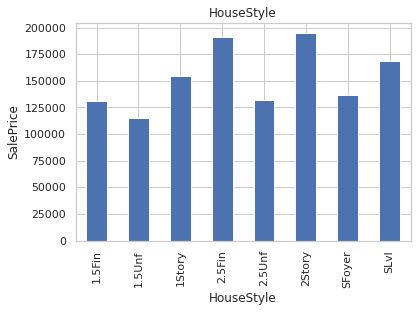

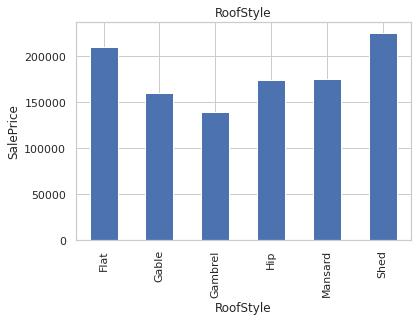

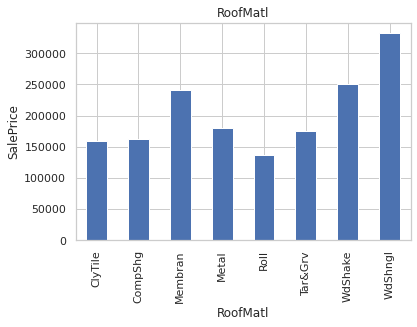

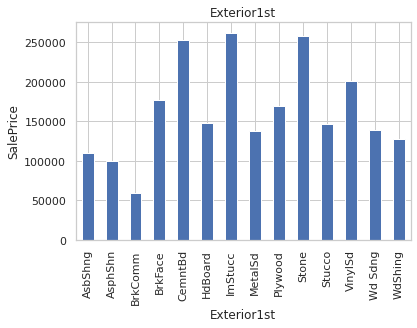

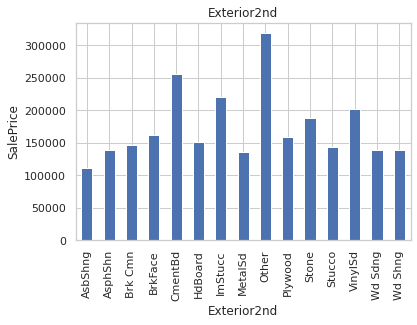

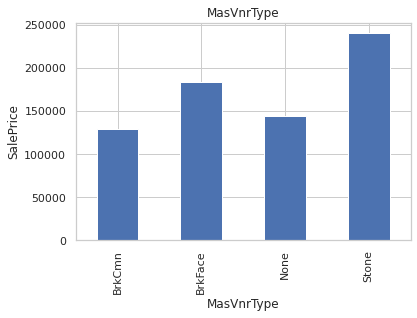

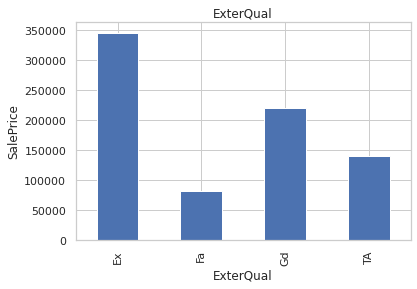

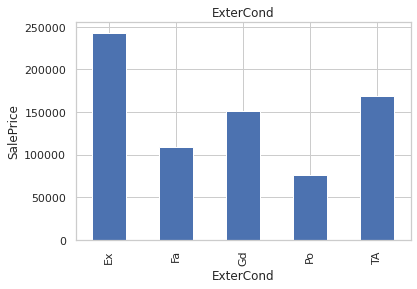

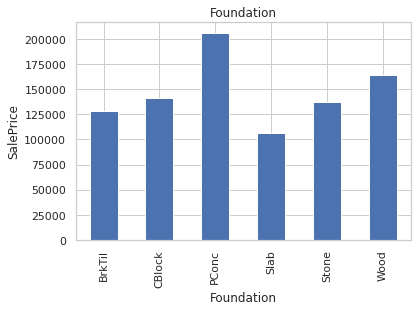

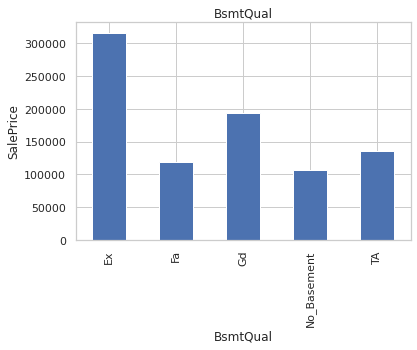

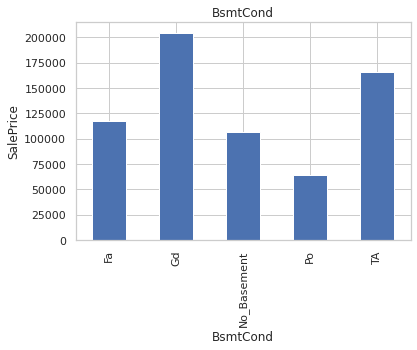

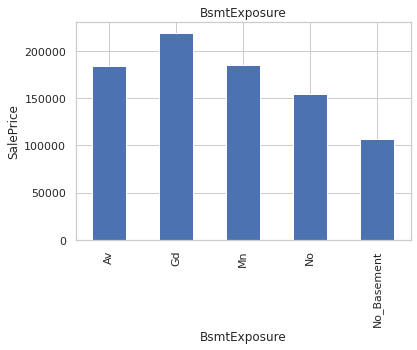

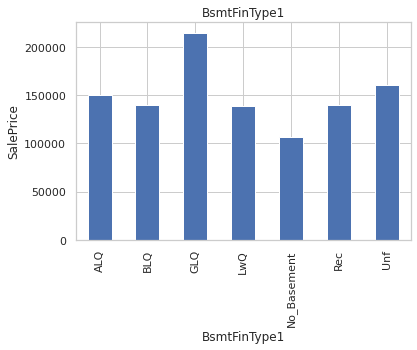

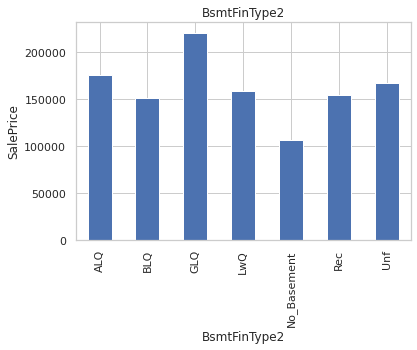

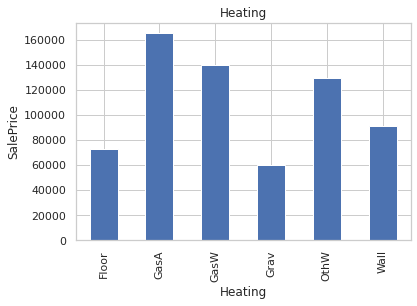

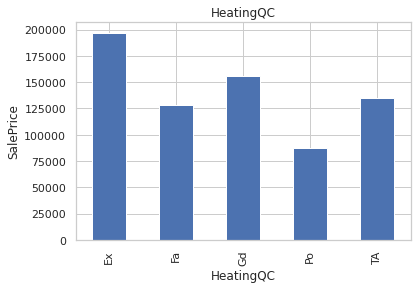

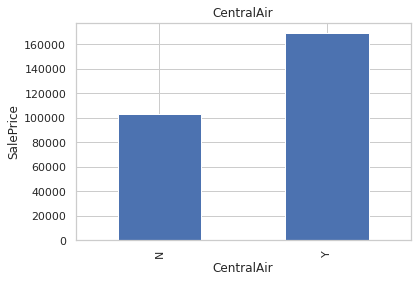

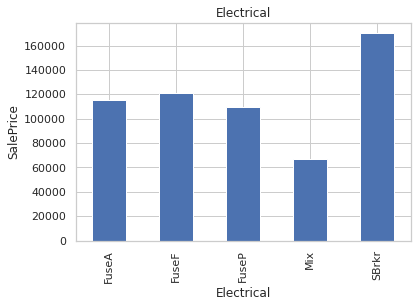

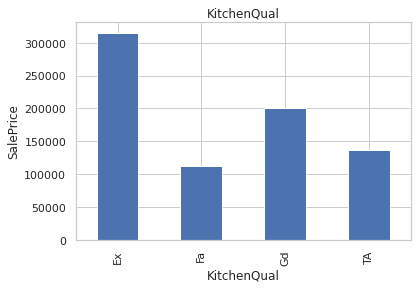

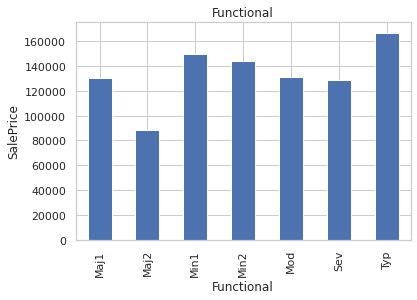

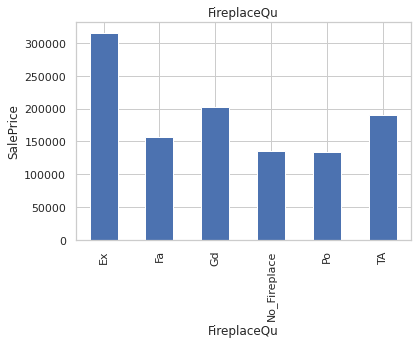

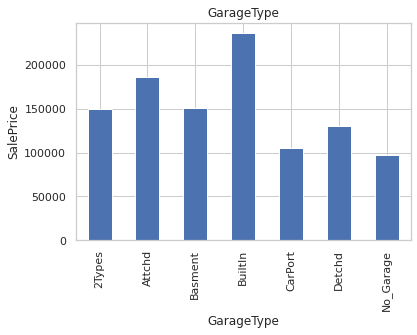

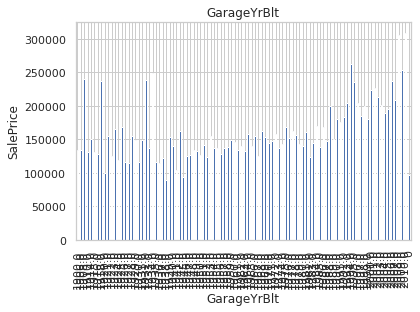

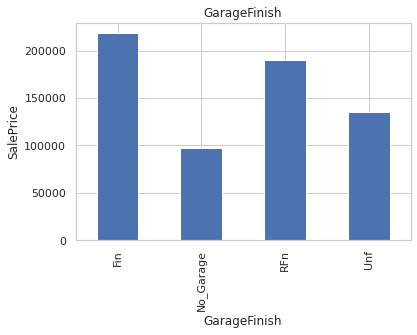

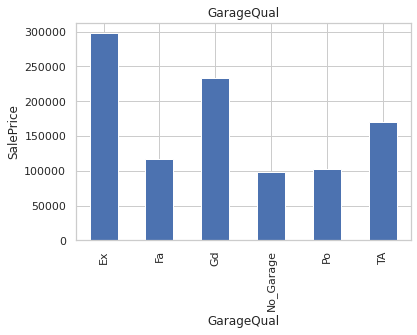

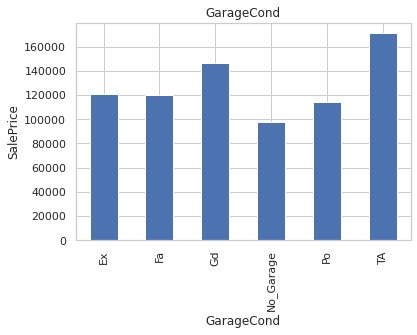

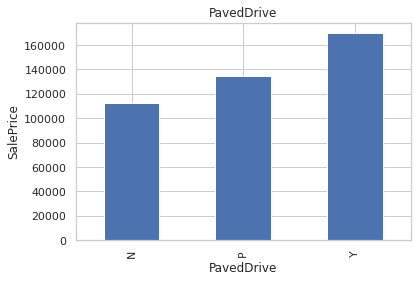

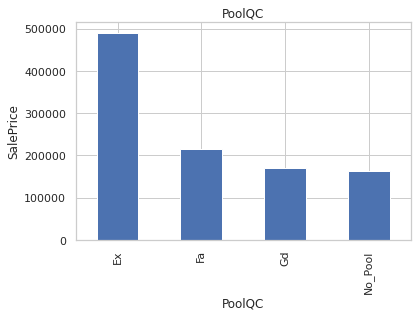

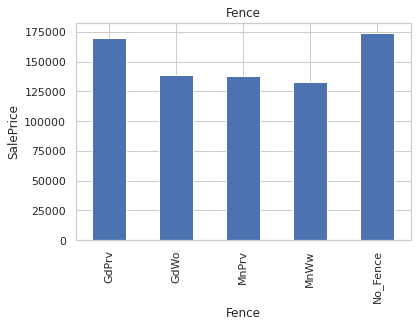

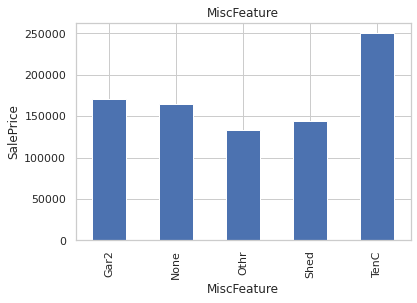

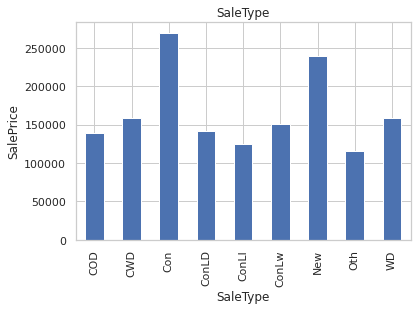

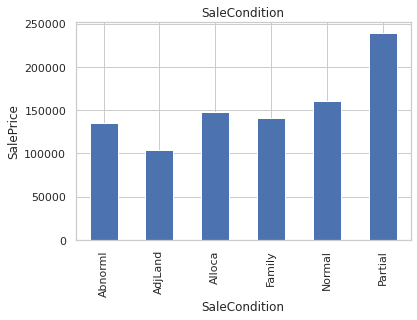

In [71]:
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [72]:
df.drop(['Id'], axis = 1,inplace=True)

In [73]:
dft.drop(['Id'], axis = 1,inplace=True)

In [74]:
df.skew()

MSSubClass        1.422019
LotFrontage       2.733440
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.835718
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -3.898694
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
SalePrice         1.953878
d

In [76]:
numerical_feature=[feature for feature in df.columns if feature not in categorical_features]
print("Numerical Feature Count",len(numerical_feature))

Numerical Feature Count 36


In [78]:
for col in df[numerical_feature].columns:
    if df.skew().loc[col]>0.55 and col!='SalePrice':
        df[col]=np.log1p(df[col])

In [79]:
df.skew()

MSSubClass        0.235373
LotFrontage      -0.793980
LotArea          -0.169107
OverallQual       0.175082
OverallCond      -0.418916
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        0.518966
BsmtFinSF1       -0.606859
BsmtFinSF2        2.502785
BsmtUnfSF        -2.129882
TotalBsmtSF      -5.146574
1stFlrSF          0.105795
2ndFlrSF          0.289335
LowQualFinSF      7.090715
GrLivArea         0.001448
BsmtFullBath      0.430791
BsmtHalfBath      4.049438
FullBath          0.057809
HalfBath          0.543681
BedroomAbvGr      0.243855
KitchenAbvGr      3.678394
TotRmsAbvGrd     -0.071926
Fireplaces        0.188280
GarageYrBlt      -3.898694
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        0.131075
OpenPorchSF      -0.004279
EnclosedPorch     2.079610
3SsnPorch         7.196594
ScreenPorch       3.104665
PoolArea         12.826713
MiscVal           5.159109
MoSold            0.220979
YrSold            0.115765
SalePrice         1.953878
d

In [80]:
numerical_feature=[feature for feature in dft.columns if feature not in categorical_features]
print("Numerical Feature Count",len(numerical_feature))

Numerical Feature Count 35


In [81]:
for col in dft[numerical_feature].columns:
    if dft.skew().loc[col]>0.55:
        dft[col]=np.log1p(dft[col])

In [82]:
dft.skew()

MSSubClass        0.301590
LotFrontage       0.499491
LotArea          -0.016494
OverallQual       0.397312
OverallCond       0.606771
YearBuilt        -0.755233
YearRemodAdd     -0.535600
MasVnrArea        0.444701
BsmtFinSF1       -0.668665
BsmtFinSF2        2.622732
BsmtUnfSF        -2.454060
TotalBsmtSF       0.519257
1stFlrSF         -0.013105
2ndFlrSF          0.292337
LowQualFinSF      9.820031
GrLivArea        -0.022042
BsmtFullBath      0.463685
BsmtHalfBath      3.544994
FullBath         -0.049800
HalfBath          0.661487
BedroomAbvGr      0.075315
KitchenAbvGr      4.548551
TotRmsAbvGrd      0.017772
Fireplaces        0.540164
GarageYrBlt      -3.776995
GarageCars       -0.280324
GarageArea        0.133547
WoodDeckSF        0.244705
OpenPorchSF      -0.100802
EnclosedPorch     2.258484
3SsnPorch        12.028006
ScreenPorch       3.363599
PoolArea          0.000000
MiscVal           5.232903
MoSold            0.186504
YrSold            0.018412
dtype: float64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   float64
 1   MSZoning       1168 non-null   int64  
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   float64
 4   Street         1168 non-null   int64  
 5   Alley          1168 non-null   int64  
 6   LotShape       1168 non-null   int64  
 7   LandContour    1168 non-null   int64  
 8   Utilities      1168 non-null   int64  
 9   LotConfig      1168 non-null   int64  
 10  LandSlope      1168 non-null   int64  
 11  Neighborhood   1168 non-null   int64  
 12  Condition1     1168 non-null   int64  
 13  Condition2     1168 non-null   int64  
 14  BldgType       1168 non-null   int64  
 15  HouseStyle     1168 non-null   int64  
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   float64
 18  YearBuil

In [91]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_features:
  df[i]=le.fit_transform(df[i])

In [95]:
categorical_features=[feature for feature in dft.columns if dft[feature].dtypes=='O']
dft[categorical_features].head()

,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,2005,Fin,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
1,1984,RFn,TA,TA,Y,No_Pool,No_Fence,None,COD,Abnorml
2,2001,RFn,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
3,1941,Unf,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
4,2007,Fin,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal


In [97]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    float64
 1   MSZoning       292 non-null    int64  
 2   LotFrontage    292 non-null    float64
 3   LotArea        292 non-null    float64
 4   Street         292 non-null    int64  
 5   Alley          292 non-null    int64  
 6   LotShape       292 non-null    int64  
 7   LandContour    292 non-null    int64  
 8   Utilities      292 non-null    int64  
 9   LotConfig      292 non-null    int64  
 10  LandSlope      292 non-null    int64  
 11  Neighborhood   292 non-null    int64  
 12  Condition1     292 non-null    int64  
 13  Condition2     292 non-null    int64  
 14  BldgType       292 non-null    int64  
 15  HouseStyle     292 non-null    int64  
 16  OverallQual    292 non-null    int64  
 17  OverallCond    292 non-null    float64
 18  YearBuilt 

In [132]:
categorical_features=[feature for feature in dft.columns if dft[feature].dtypes=='O']
dft[categorical_features].head()

,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,2005,Fin,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
1,1984,RFn,TA,TA,Y,No_Pool,No_Fence,None,COD,Abnorml
2,2001,RFn,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
3,1941,Unf,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal
4,2007,Fin,TA,TA,Y,No_Pool,No_Fence,None,WD,Normal


In [144]:
categorical_features

['GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
le = LabelEncoder()
for i in categorical_features:
  dft[i]=le.fit_transform(dft[i])

In [101]:
x=df.drop(columns=['SalePrice'],axis=1)
y=df['SalePrice']

In [102]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x)
X=pd.DataFrame(sc_x,columns=x.columns)

In [ ]:
from sklearn.decomposition import PCA
testPCA=PCA()
Y=testPCA.fit(X)

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [104]:
MaX_r2_score=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    r2_scores = r2_score(y_test,y_pred)
    if r2_scores>MaX_r2_score:
        MaX_r2_score = r2_scores
        random_state = i
    
print("MaX R2 score corresponding to random state",random_state,"is",MaX_r2_score)

MaX R2 score corresponding to random state 181 is 0.8738982958039998


In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=181)

In [109]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [107]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.8269034944211593


In [110]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,LR_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,LR_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,LR_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,LR_predict))
print('r2_score:',r2_score(y_test,LR_predict))

Mean Absolute Error:  19645.257718700635
Mean Squared Error:  740049855.9877119
Root Mean Squared Error:  27203.857373315863
Explained Variance Score:  0.874274053568577
r2_score: 0.8738982958039998


In [111]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predictions1=rf.predict(x_test)
print(rf.score(x_train,y_train))

0.9757357202074779


In [112]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,predictions1))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,predictions1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,predictions1)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,predictions1))
print('r2_score:',r2_score(y_test,predictions1))

Mean Absolute Error:  15696.649572649572
Mean Squared Error:  522624203.94180346
Root Mean Squared Error:  22860.975568461716
Explained Variance Score:  0.9114031507631508
r2_score: 0.9109468068429247


In [113]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

1.0


In [114]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,DTR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,DTR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,DTR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,DTR_PRED))
print('r2_score:',r2_score(y_test,DTR_PRED))

Mean Absolute Error:  25924.508547008547
Mean Squared Error:  1445540875.1581197
Root Mean Squared Error:  38020.26926730161
Explained Variance Score:  0.7568717795248525
r2_score: 0.7536852870552504


**Hyper parameter tuning**

In [117]:
RF=RandomForestRegressor()
param={
     'n_estimators':[100,200,],
    'criterion':["mse", "mae"],
    'min_samples_split':[2],
   'min_samples_leaf' : [1],
}

In [118]:
from sklearn.model_selection import GridSearchCV
RF_grid=GridSearchCV(RandomForestRegressor(),param,cv=4)

In [119]:
RF_grid.fit(x_train,y_train)
RF_grid_PRED=RF_grid.best_estimator_.predict(x_test)

In [120]:
RF_grid.best_params_

{'criterion': 'mse',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [121]:
rf=RandomForestRegressor(criterion='mse',min_samples_leaf=1,min_samples_split=2,n_estimators=200)
rf.fit(x_train,y_train)
rf_predictions=rf.predict(x_test)

In [122]:
print(rf.score(x_train,y_train))

0.9752949264682775


In [139]:
import joblib
joblib.dump(rf,'Housing_Project.pkl')

['Housing_Project.pkl']

In [125]:
dft

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,3.044522,2,86.0,9.558035,1,1,0,1,0,0,0,21,2,0,0,2,9,1.791759,2005,2006,3,0,9,11,3,5.303305,2,3,2,0,3,1,2,7.130899,6,0.0,6.513230,1922,0,0,1,3,7.561642,0.000000,0.0,7.561642,1,0.000000,2,0.000000,3,0.693147,2,2.197225,5,1,2,1,2005,Fin,3,676,TA,TA,Y,5.187386,3.951244,0.000000,0.0,0.0,0,No_Pool,No_Fence,None,0.000000,7,2007,WD,Normal
1,4.795791,2,65.0,8.668196,1,1,0,3,0,1,0,21,2,0,4,2,8,1.791759,1984,1984,1,0,5,5,2,0.000000,2,3,1,2,3,0,2,6.944087,6,0.0,5.220356,1220,0,2,1,3,7.215975,0.000000,0.0,7.215975,1,0.000000,1,0.000000,1,0.693147,2,1.609438,5,1,0,1,1984,RFn,2,565,TA,TA,Y,4.158883,0.000000,0.000000,0.0,0.0,0,No_Pool,No_Fence,None,0.000000,8,2009,COD,Abnorml
2,3.044522,2,65.0,9.379154,1,1,3,3,0,4,0,4,2,0,0,2,8,1.791759,2001,2001,3,0,9,11,2,0.000000,2,3,2,2,3,0,6,0.000000,6,0.0,7.469654,1753,0,0,1,3,7.489412,0.000000,0.0,7.489412,0,0.000000,2,0.000000,3,0.693147,0,2.079442,5,1,5,1,2001,RFn,2,522,TA,TA,Y,5.313206,5.023881,0.000000,0.0,0.0,0,No_Pool,No_Fence,None,0.000000,6,2009,WD,Normal
3,4.262680,2,75.0,9.392745,1,1,3,0,0,4,0,5,2,0,0,5,7,2.079442,1941,1950,1,0,6,7,2,0.000000,3,3,1,4,3,3,5,5.620401,6,0.0,6.063785,704,0,0,1,3,6.758095,6.558198,0.0,7.355641,0,0.000000,1,0.693147,3,0.693147,1,2.079442,5,1,2,1,1941,Unf,1,234,TA,TA,Y,0.000000,0.000000,0.000000,0.0,0.0,0,No_Pool,No_Fence,None,0.000000,7,2009,WD,Normal
4,4.110874,2,86.0,9.588708,1,1,0,3,0,1,0,20,1,0,0,5,6,1.791759,2007,2007,1,0,9,11,3,4.317488,2,3,2,2,3,2,6,0.000000,6,0.0,6.796824,894,0,0,1,3,6.796824,6.946976,0.0,7.567346,0,0.000000,2,0.693147,4,0.693147,2,2.302585,5,1,2,3,2007,Fin,3,668,TA,TA,Y,4.615121,2.944439,0.000000,0.0,0.0,0,No_Pool,No_Fence,None,0.000000,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,3.044522,2,78.0,9.230829,1,1,3,3,0,4,0,20,2,0,0,2,8,1.791759,2007,2007,1,0,9,11,3,6.150603,3,3,2,2,3,3,2,3.526361,6,0.0,7.333676,1563,0,0,1,3,7.355002,0.000000,0.0,7.355002,0,0.000000,2,0.000000,3,0.693147,2,1.945910,5,1,2,1,2007,RFn,3,758,TA,TA,Y,4.976734,4.605170,0.000000,0.0,0.0,0,No_Pool,No_Fence,None,0.000000,10,2008,WD,Normal
288,3.044522,2,57.0,9.131946,1,1,1,3,0,4,0,4,2,0,0,2,5,1.791759,1994,1995,1,0,9,11,2,0.000000,3,3,2,2,3,3,2,6.532334,6,0.0,5.720312,990,0,0,1,3,6.898715,0.000000,0.0,6.898715,0,0.693147,1,0.000000,3,0.693147,3,1.791759,5,0,3,5,1996,Unf,2,672,TA,TA,Y,0.000000,0.000000,0.000000,0.0,0.0,0,No_Pool,No_Fence,None,0.000000,2,2008,WD,Normal
289,3.044522,2,65.0,9.327412,1,1,0,3,0,1,0,11,2,0,0,2,6,2.079442,1970,1970,1,0,10,12,1,5.198497,3,3,1,4,3,3,0,6.361302,6,0.0,6.056784,1004,0,0,1,3,6.912743,0.000000,0.0,6.912743,1,0.000000,1,0.000000,2,0.693147,3,1.791759,5,1,5,1,1970,Fin,2,480,TA,TA,Y,0.000000,0.000000,0.000000,0.0,0.0,0,No_Pool,No_Fence,Shed,6.552508,3,2010,WD,Normal
290,3.931826,3,50.0,8.517393,1,1,3,3,0,0,0,2,1,0,0,0,6,2.079442,1947,1950,1,0,4,4,2,0.000000,3,2,1,4,3,3,0,5.991465,6,0.0,6.406880,1004,0,0,1,3,6.912743,6.

In [ ]:
sc=StandardScaler()
sc_x=sc.fit_transform(dft)
x=pd.DataFrame(sc_x,columns=dft.columns)

In [141]:
model=joblib.load('Housing_Project.pkl')

In [142]:
import sys
nums= model.predict(x)
np.set_printoptions(threshold=sys.maxsize)
print(nums)

[131023.06  299609.455 252175.95  192376.25  211112.82  217336.455
 137046.62  156623.55  140788.25  117815.25  122934.575 229244.35
 207650.91  132026.115 125819.18  147911.055 124830.415 192099.435
 148922.    108747.98  222272.845 132310.8   137693.275 136781.75
 144746.29  210866.85  126215.035 372004.195 113425.715 177995.425
 295288.98  138717.64  192269.84  130209.275 172929.9   127238.85
 160366.19  211450.755 150550.41   92211.075 196094.    123995.91
 146983.64  142060.91  145333.1   126317.    189123.035 141959.48
  63133.095 148698.25  313000.39  229454.75   65416.315 149476.845
  92531.64  231323.    209062.24  195306.025 105004.205 249638.675
 107563.83  125821.08  161421.26  214780.385 121600.    342945.35
 127835.495 125769.915 205381.18  145843.875 175091.41  220925.485
  88549.825 162941.5    82098.245 299439.29  134287.01   89991.135
 373924.79  219959.475 205279.885 125833.5   162403.45  166176.69
 158521.99  103122.32  111196.75  166974.18  176607.655 122140.5
 151

# **Finaly Our model predicted the output**